#Zomato data analysis project

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("E:\\Data_Analytics_Projects\\Zomato_data_analysis\\Zomato_data.csv")

df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [7]:
pd.isnull(df).sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [8]:
df.info

<bound method DataFrame.info of                       name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet 

In [9]:
df.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

In [10]:
df.rename(columns={"rate":"rating"},inplace=True)

In [11]:
df.head()

,name,online_order,book_table,rating,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [15]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rating']=df['rating'].apply(handleRate)
df.head()

,name,online_order,book_table,rating,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


##TYPE OF RESTAURENTS

In [ ]:
#What tpe of restauant do the majority of customers order from??

Text(0.5, 0, 'Type of Resturant')

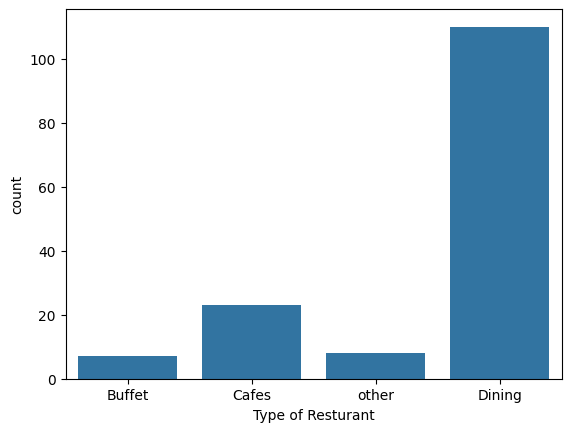

In [21]:
ax=sns.countplot(x="listed_in(type)",data=df)
plt.xlabel("Type of Resturant")


In [ ]:
#Conclusion:-majority of the restaurant is from Dinning 

How many votes has each type of restaurant received from customers ?

Text(0, 0.5, 'Total no of votes')

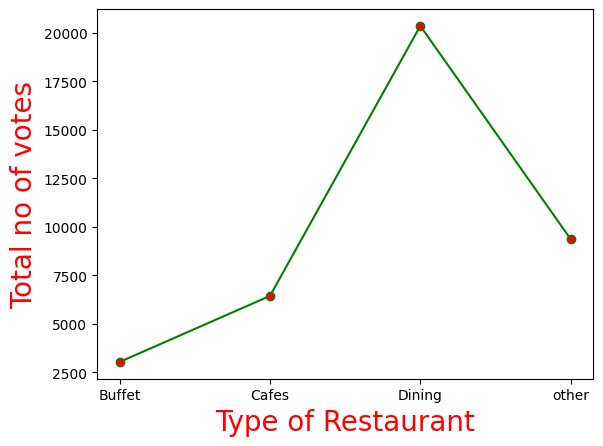

In [41]:
gd=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':gd})

plt.plot(result,c='green',marker='o',mfc='red')  #---->mfc=markerfacecolor
plt.xlabel("Type of Restaurant",c='red',size='20')
plt.ylabel("Total no of votes",c='red',size='20')


In [ ]:
#Conclusion:-dinning restaurant has recieve maximum votes

What are the ratings that the majority of restaurants have recieved?

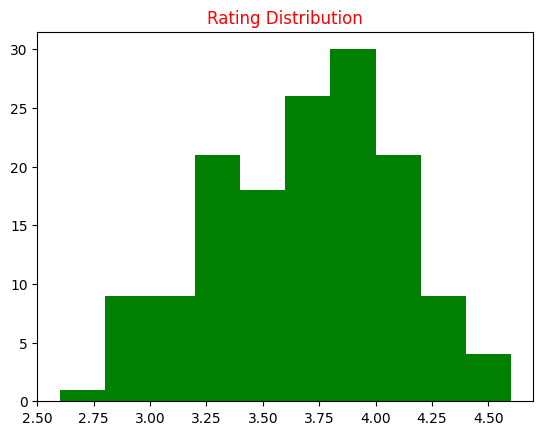

In [51]:
plt.hist(df['rating'],bins=10,color="green")
plt.title("Rating Distribution",c="red")
plt.show()

In [52]:
#conculsion:The majority reasturant recieved from 3.5  to 4

Zomato has observed that most couples order most of thier food online ,What is their average spending on each order???

Text(0.5, 1.0, 'Couple_Average_spending')

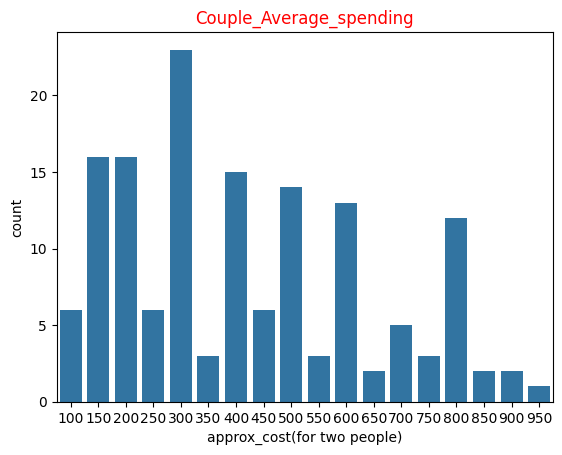

In [62]:
cd=sns.countplot(x="approx_cost(for two people)",data=df)

plt.title("Couple_Average_spending", c="red")

In [63]:
#conclusion:-The majority of couples prefer restaurant ith an approrite cost of ruppes 300 average

Which mode (online or  offline) has recieved the maxiumum rating??

<Axes: xlabel='online_order', ylabel='rating'>

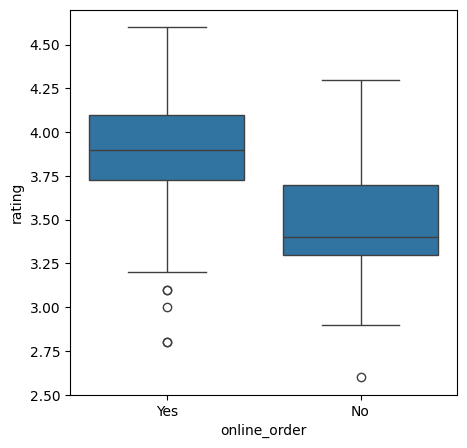

In [70]:
plt.figure(figsize=(5,5))

sns.boxplot(x="online_order",y="rating",data=df)


In [71]:
#conclusion:_Offline order recieved lower rating a compare to Online order

Which type of restaurant recieved more offline orders, so that zomato can prove customers with some good offers 

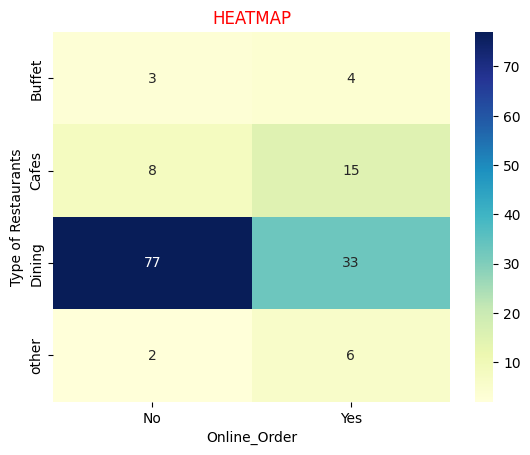

In [83]:
pt=df.pivot_table(index="listed_in(type)",columns="online_order", aggfunc="size", fill_value=0)
sns.heatmap(pt,annot=True, cmap="YlGnBu",fmt="d")

plt.title("HEATMAP",c="red")
plt.xlabel("Online_Order")
plt.ylabel("Type of Restaurants")
plt.show()

In [84]:
#conculuion:-Dinning restaurants primarliy accept offlie orders whereas cafes primarlily receive online orders.This suggests that clients preferes orders in perso at reastaurant, but prefer online ordering at cafes 